In [17]:
%run function_and_library.ipynb

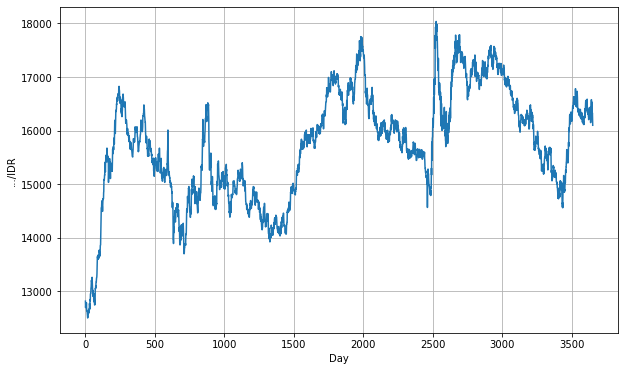

1/1 [==============================] - 0s 23ms/step


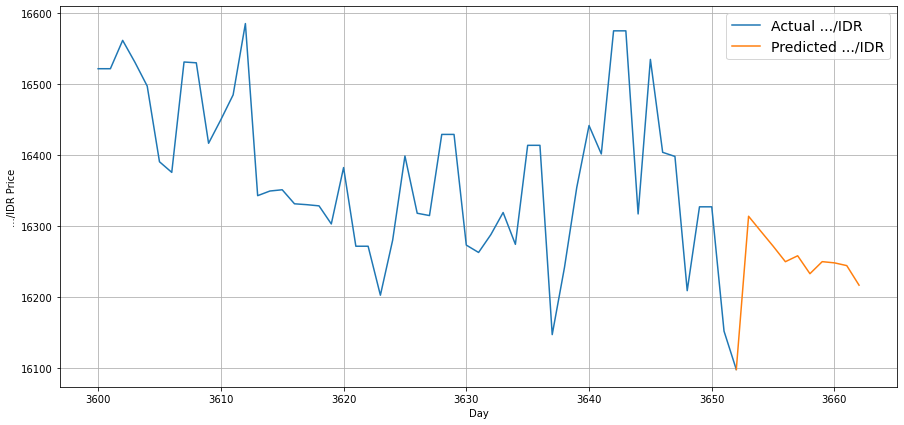

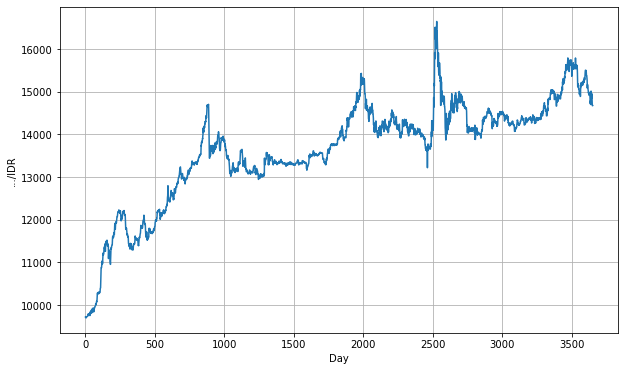

1/1 [==============================] - 0s 33ms/step


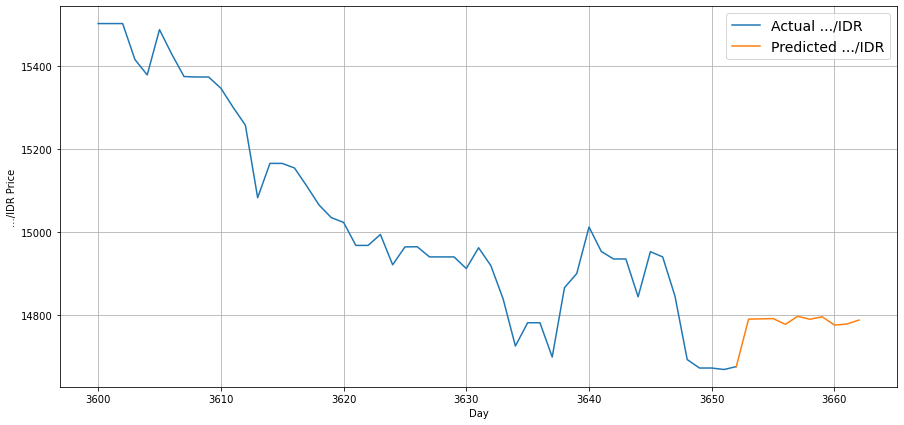

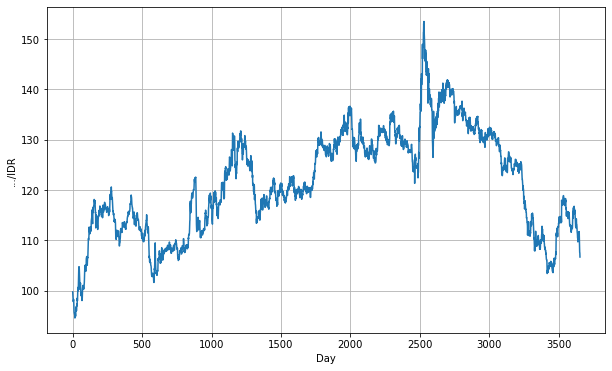

1/1 [==============================] - 0s 24ms/step


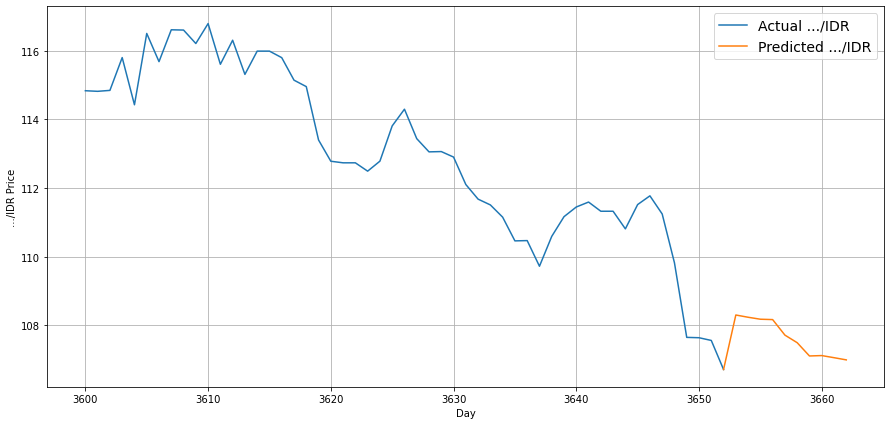

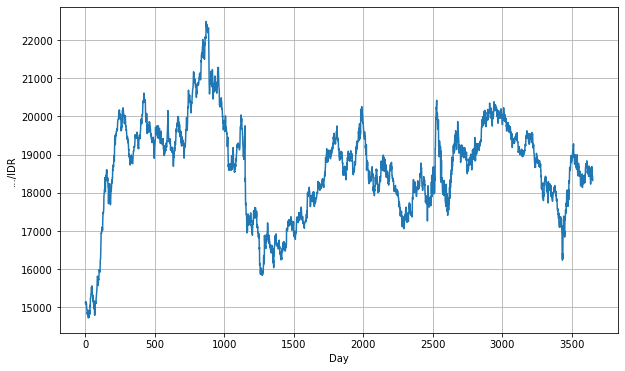

1/1 [==============================] - 0s 24ms/step


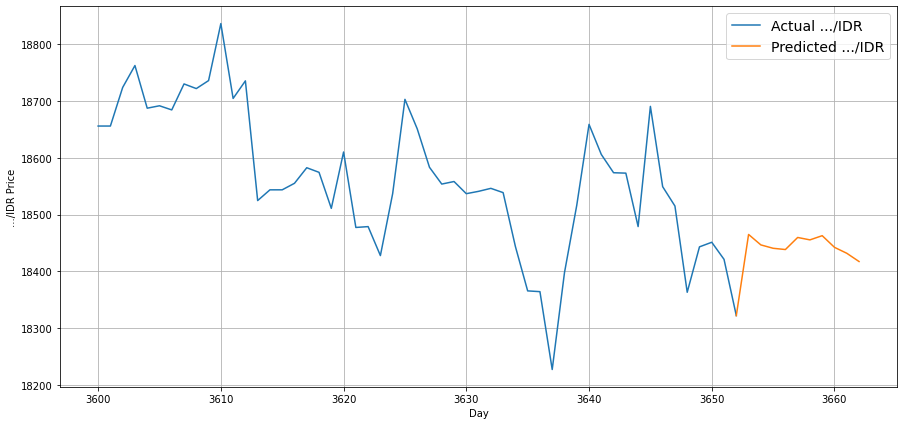

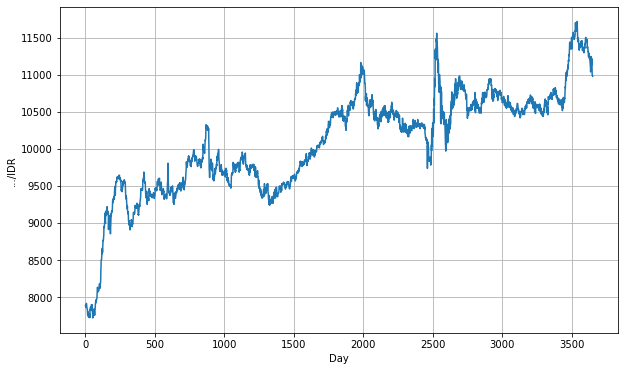

1/1 [==============================] - 0s 22ms/step


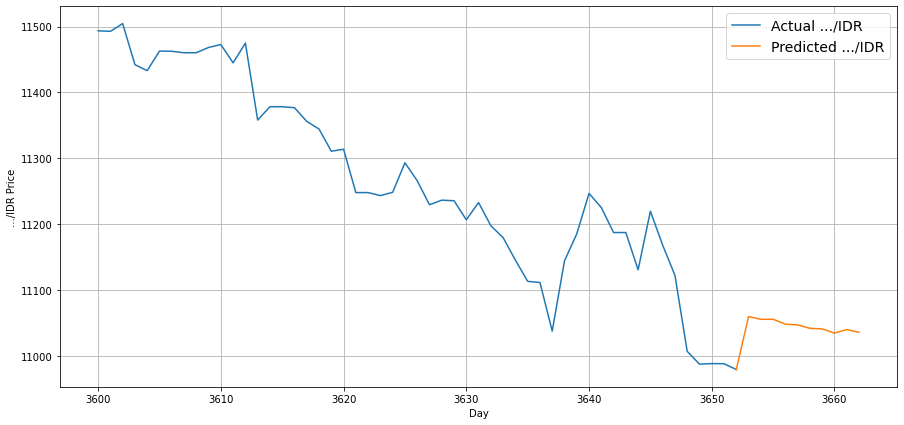

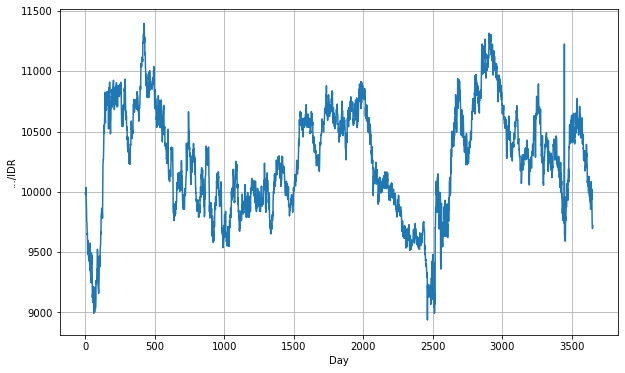

1/1 [==============================] - 0s 32ms/step


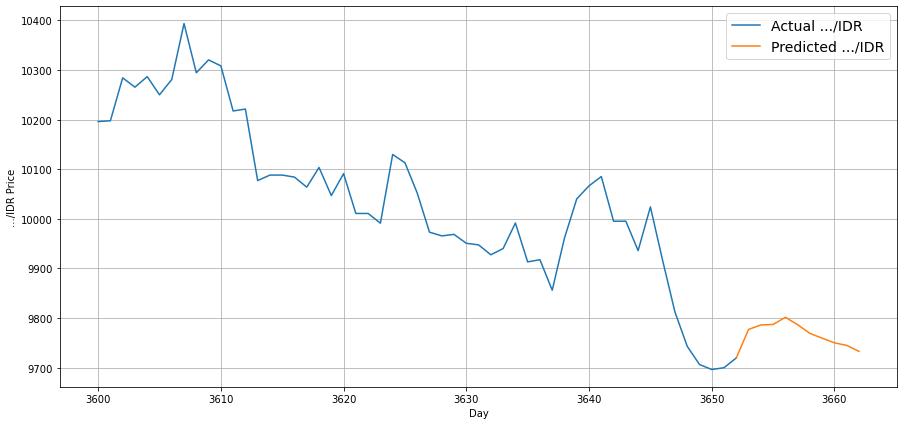

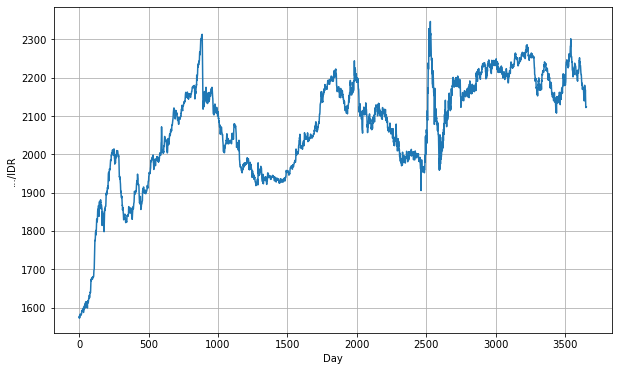

1/1 [==============================] - 0s 34ms/step


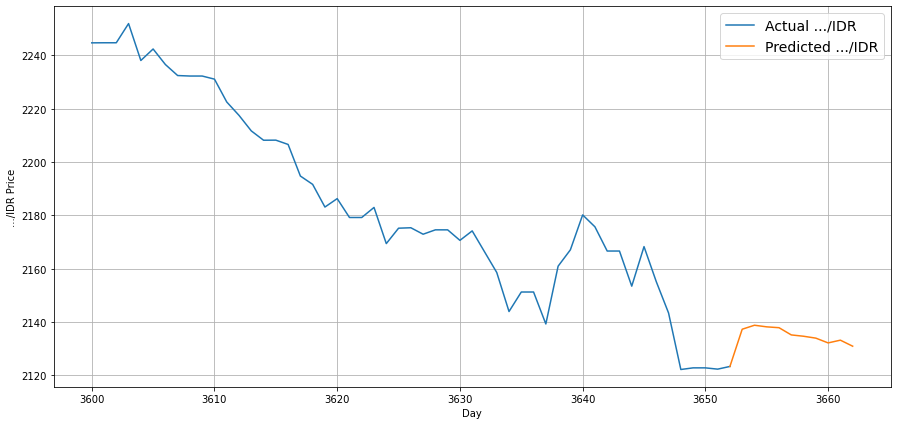

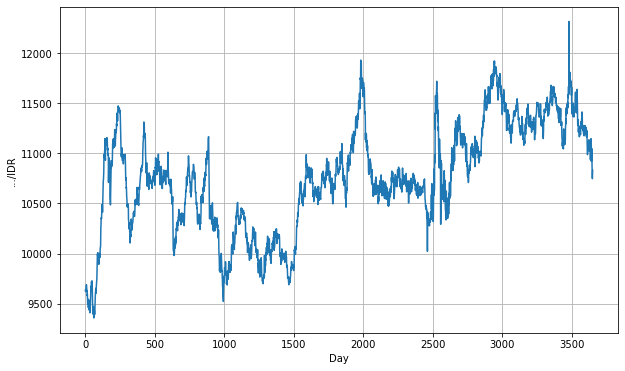

1/1 [==============================] - 0s 32ms/step


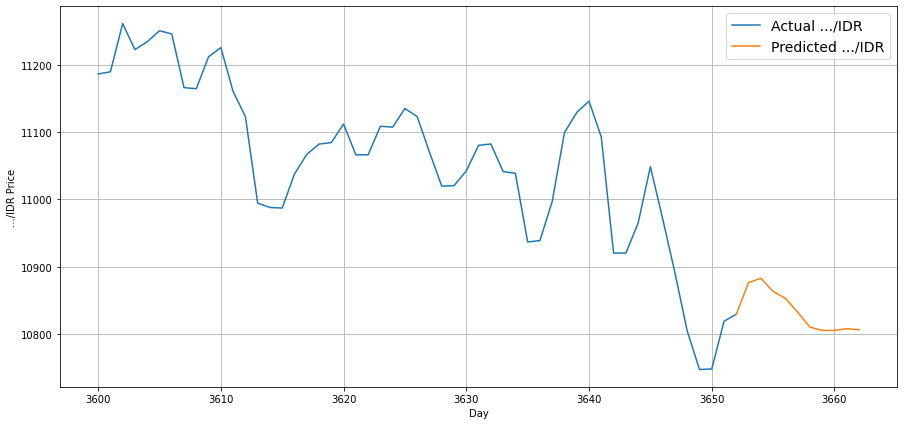

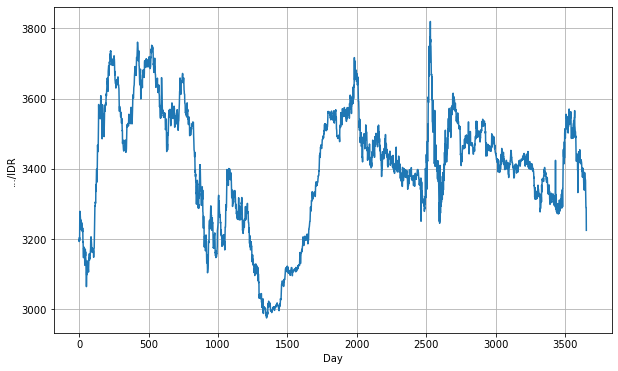

1/1 [==============================] - 0s 50ms/step


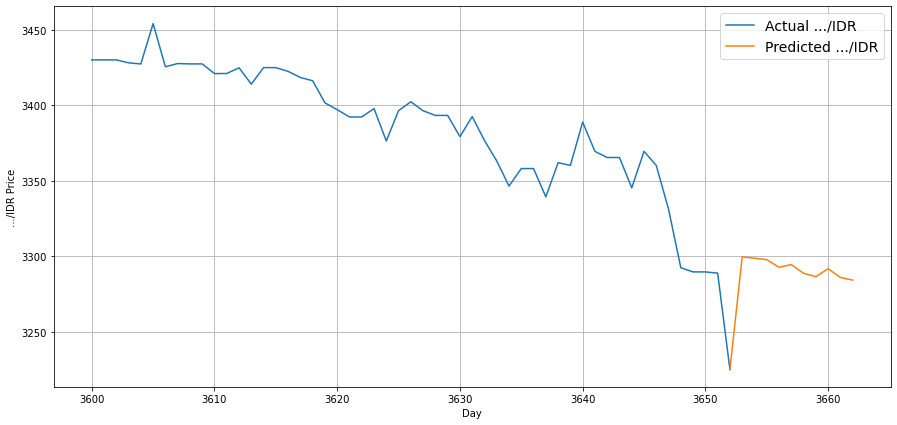

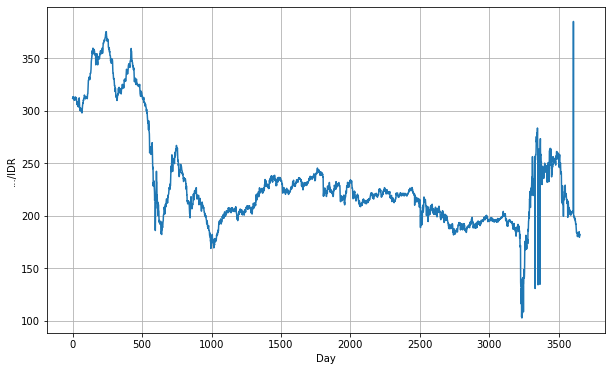

1/1 [==============================] - 0s 45ms/step


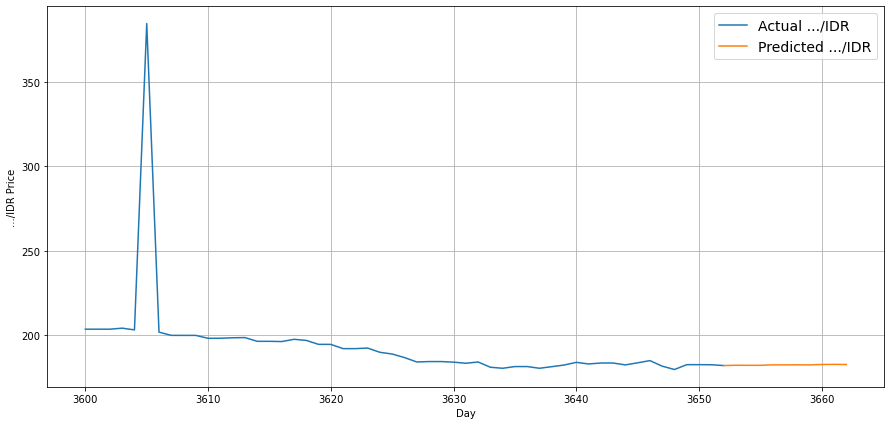

In [19]:
md = [11,12,3,14,15,16,17,8,19,20]
eva = []

for i, model_number in enumerate(md):
    # Initialize lists
    time_step = []
    sunspots = []

    # Open CSV file
    with open('./currency_data_10_years.csv') as csvfile:

        # Initialize reader
        reader = csv.reader(csvfile, delimiter=',')

        # Skip the first line
        next(reader)

        # Append row and sunspot number to lists
        for j,row in enumerate(reader):
            time_step.append(int(j))
            sunspots.append(float(row[i+1]))

    # Convert lists to numpy arrays
    time = np.array(time_step)
    series = np.array(sunspots)

    # Preview the data
    plot_series(time, series, xlabel='Day', ylabel='.../IDR')
    
    split_time = 3000

    x_train = series[:split_time]
    time_train = time[:split_time]

    x_valid = series[split_time:]
    time_valid = time[split_time:]

    window_size = 30
    batch_size = 128
    shuffle_buffer_size = 1000

    train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
    valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)
    
    model = tf.keras.models.load_model(f"-second/{model_number}/")
    model.evaluate(valid_set)

    into_future = 10
    future_forecast = make_future_forecast(values=series,
                                           model=model,
                                           into_future=into_future,
                                           window_size=window_size)
    
    next_time_steps = np.arange(time[-1] + 1, time[-1] + 1 + into_future)
    next_time_steps

    # Insert last timestep/final price into next time steps and future forecasts so the plot connects
    next_time_steps = np.insert(next_time_steps, 0, time[-1])
    future_forecast = np.insert(future_forecast, 0, series[-1])
    
    plt.figure(figsize=(15, 7))
    plot_time_series(time, series, start=3600, format="-", label="Actual .../IDR")
    plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted .../IDR")

#     eval_model = evaluate_predss(y_true=series,
#                                    y_pred=future_forecast)
    
#     eva.append(eval_model)

In [20]:
# # Create a dictionary using the "md" list as keys and the "eva" list as values
# eva_data = {str(m): e for m, e in zip(md, eva)}

# # Convert the dictionary into a DataFrame
# eva_results = pd.DataFrame.from_dict(eva_data, orient='index')

# # Add a column for the row names
# eva_results.index.name = 'md'

# eva_results